In [2]:
import panel as pn
pn.extension()

In [3]:
my_layout = pn.Column(
    pn.Row('# 1', '# 2', '# 3', background='pink'),
    pn.Row('# A', '# B', '# C'),
    pn.pane.PNG('https://thumbs.gfycat.com/ClearTinyDachshund-size_restricted.gif', height=250, width=400)
)

Column
    [0] Row(background='pink')
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
    [1] Row
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
    [2] PNG(str, height=250, sizing_mode='fixed', width=400)
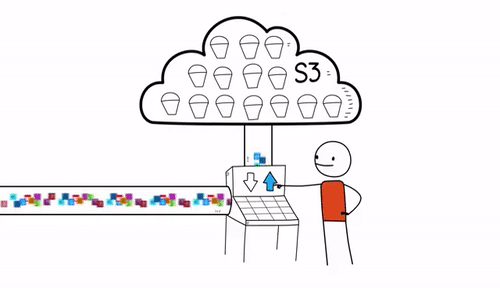

In [4]:
my_layout

In [5]:
title = '# Fun with Buckets'

In [6]:
my_layout = pn.Column( 
    title,
    title,
    title
)

In [7]:
my_layout

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)

In [11]:
def get_bucket_list():
    '''
    ___________________________________________________________________
    THIS function returns watersmart S3 bucket names
    __________________________________________________________________
      - we only need THREE (3) buckets to do our work
    our buckets are used for our data inputs
          - ws-in: holds precip, NDVI, Temperature - inputs to our water models
          - ws-out: is our model outputs - sometimes just tiles and chips
          - ws-enduser: - is where we mosaic these into usable tifs, netcdfs, ugly-tarballs 
          ... etc ...
    '''
    b_list = ['ws-in', 'ws-out', 'ws-enduser']
    return b_list

In [14]:
bucket_select = pn.widgets.Select(name='IMPORTANT_BUCKET_LIST', options=get_bucket_list())

In [19]:
table_plot_select = pn.widgets.RadioBoxGroup(name='RadioBoxGroup', options=['Plot','Table'], inline=True)


In [67]:
display_select = pn.widgets.MultiSelect(width_policy='min', name='Display Select', value=['Gbytes',],
    options=['Gbytes', 'Costs',], size=2)


In [68]:
help(pn.widgets.MultiSelect)

Help on class MultiSelect in module panel.widgets.select:

class MultiSelect(_MultiSelectBase)
 |  MultiSelect(*, inline, value, options, disabled, loading, align, aspect_ratio, background, css_classes, height, height_policy, margin, max_height, max_width, min_height, min_width, sizing_mode, visible, width, width_policy, name, **kwargs)
 |  
 |  Parameters of 'MultiSelect'
 |  ===========================
 |  
 |  Parameters changed from their default values are marked in red.
 |  Soft bound values are marked in cyan.
 |  C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None
 |  
 |  Name             Value        Type         Bounds     Mode  
 |  
 |  align           'start'  ClassSelector                V RW  
 |  aspect_ratio      None     Parameter                V RW AN 
 |  background        None     Parameter                V RW AN 
 |  css_classes       None        List       (0, None)  V RW AN 
 |  width             None      Integer      (0, None)  V RW AN 
 |  hei

In [69]:
selectors = pn.Row(bucket_select, display_select, table_plot_select)

In [70]:
selectors

Row
    [0] Select(name='IMPORTANT_BUCKET_LIST', options=['ws-in', 'ws-out', ...], value='ws-out')
    [1] MultiSelect(name='Display Select', options=['Gbytes', 'Costs'], size=2, value=['Gbytes'], width_policy='min')
    [2] RadioBoxGroup(inline=True, options=['Plot', 'Table'], value='Table')

In [71]:
import pandas as pd

url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
c=pd.read_csv(url)

In [72]:
df = c.head(10)

In [73]:
df.reset_index(drop=True, inplace=True)

In [74]:
df

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


In [75]:
df_widget = pn.widgets.DataFrame(df, show_index=False, fit_columns=True, row_height=23, name='Countries DataFrame')

In [76]:
my_layout = pn.Column( 
    title,
    selectors,
    df_widget
)

In [77]:
my_layout

Column
    [0] Markdown(str)
    [1] Row
        [0] Select(name='IMPORTANT_BUCKET_LIST', options=['ws-in', 'ws-out', ...], value='ws-out')
        [1] MultiSelect(name='Display Select', options=['Gbytes', 'Costs'], size=2, value=['Gbytes'], width_policy='min')
        [2] RadioBoxGroup(inline=True, options=['Plot', 'Table'], value='Table')
    [2] DataFrame(fit_columns=True, name='Countries DataFrame', row_height=23, show_index=False, value=              ...)

## https://panel.holoviz.org/reference/widgets/MultiSelect.html